In [1]:
import sys
sys.path.append('../scripts') 

In [10]:
import pandas as pd
from experience_analytics import (preprocess_data, aggregate_per_customer, 
                              compute_top_bottom_frequent, analysis_by_handset_type, 
                              perform_kmeans_clustering,plot_clusters_2d,plot_clusters_3d,
                              plot_throughput_per_handset, plot_tcp_per_handset)

In [3]:
# Load your dataset
df = pd.read_csv('../data/telecom.csv')

In [4]:
# Preprocess the data
df = preprocess_data(df)

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [5]:
#  Aggregate per customer
customer_agg = aggregate_per_customer(df)
print("Aggregated customer data:")
print(customer_agg.head())

Aggregated customer data:
              Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
Bearer Id                                                                 
6.917538e+18       429.000000        10.000000                    359.0   
6.917538e+18       109.795706        17.662883                     11.0   
6.917538e+18      1010.000000         1.000000                   2145.0   
6.917538e+18       738.000000        11.000000                   1034.0   
6.917538e+18       887.000000         2.000000                   4703.0   

              Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
Bearer Id                                                            
6.917538e+18                     67.0                 1.344110e+05   
6.917538e+18                     18.0                 2.080991e+07   
6.917538e+18                    327.0                 6.054200e+04   
6.917538e+18                     91.0                 4.667960e+05   
6.917538e+18                

In [6]:
#  Compute top, bottom, and most frequent values
for col in ['Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']:
    top, bottom, freq = compute_top_bottom_frequent(df, col)
    print(f"Top 10 {col} values:\n", top)
    print(f"Bottom 10 {col} values:\n", bottom)
    print(f"Most frequent {col} values:\n", freq)

Top 10 Avg RTT DL (ms) values:
 464     1010.0
502     1010.0
513     1010.0
514     1010.0
593     1010.0
661     1010.0
775     1010.0
967     1010.0
1066    1010.0
1144    1010.0
Name: Avg RTT DL (ms), dtype: float64
Bottom 10 Avg RTT DL (ms) values:
 32     16.0
79     16.0
147    16.0
287    16.0
381    16.0
394    16.0
431    16.0
439    16.0
486    16.0
551    16.0
Name: Avg RTT DL (ms), dtype: float64
Most frequent Avg RTT DL (ms) values:
 Avg RTT DL (ms)
109.795706    27829
28.000000      3553
27.000000      3380
34.000000      3296
35.000000      2892
37.000000      2718
36.000000      2645
38.000000      2547
29.000000      2498
26.000000      2488
Name: count, dtype: int64
Top 10 Avg Bearer TP DL (kbps) values:
 86     103160.0
321    103160.0
535    103160.0
554    103160.0
562    103160.0
564    103160.0
569    103160.0
570    103160.0
662    103160.0
684    103160.0
Name: Avg Bearer TP DL (kbps), dtype: float64
Bottom 10 Avg Bearer TP DL (kbps) values:
 13     5.0
148   

In [7]:
#  Analysis by handset type
throughput_dist, tcp_retrans_dist = analysis_by_handset_type(df)

In [8]:
# Plot results
plot_throughput_per_handset(throughput_dist)
plot_tcp_per_handset(tcp_retrans_dist)

In [9]:
#  Perform K-means clustering
df_with_clusters, kmeans = perform_kmeans_clustering(df)
print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[-0.17304594 -0.49584494  0.57716209]
 [-0.21267359  1.94464392 -0.75208447]
 [ 0.58608084  0.0182724  -1.0042939 ]]


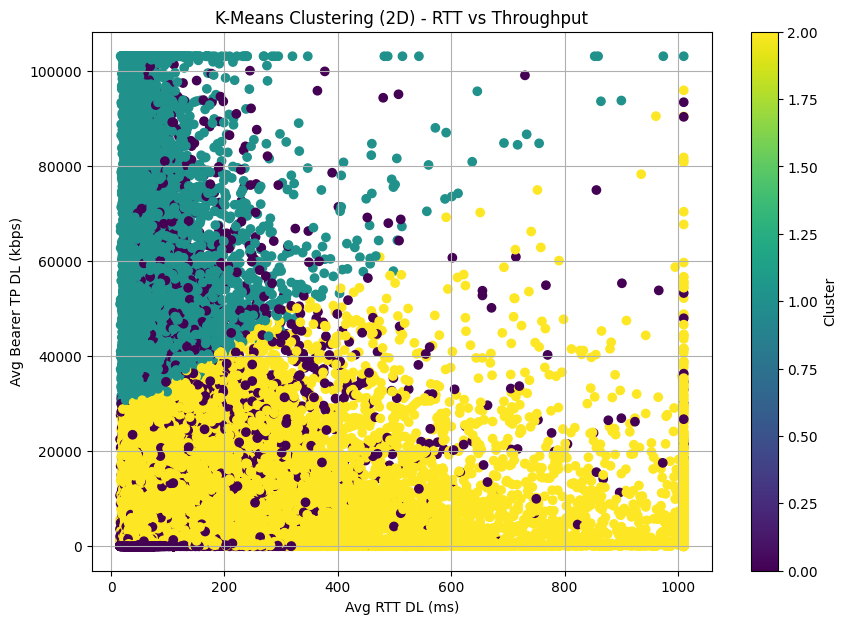

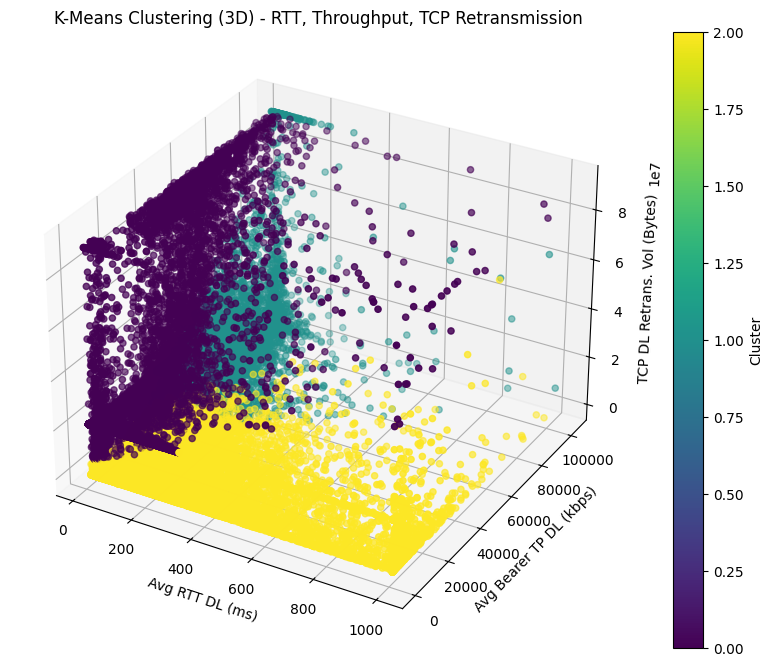

In [11]:
plot_clusters_2d(df)
plot_clusters_3d(df)